# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [ ]:
# Analysis
# 1. Latitude and Temperature have strongly correlation. Temperature drops as Latitude increases
# 2. Latitude and Wind Speed are mostly not corelated to each other.
# 3. Latitude and Humidity are weakly corelated.
# 4. Not able to get all city's Lat and Lng  using Open Weather API

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import json

url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

cities_final = pd.DataFrame(columns=["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])

print('-'*30)
print("Beginning Data Retrieval")
print('-'*30)

i=0
j=0

for city in cities:

    response = requests.get(f"{url}&q={city}")
#     print(response)
    if (response.status_code == 200):

        print(f"Processing Record {j} of Set {i+1} | {city}")
        j+=1

        if(j==50):
            i+=1
            j=0

        json_response = response.json()

        cities_final = cities_final.append({
                            "City":city,
                            "Lat":json_response['coord']['lat'],
                            "Lng":json_response['coord']['lon'],
                            "Max Temp":json_response['main']['temp_max'],
                            "Humidity":json_response['main']['humidity'],
                            "Cloudiness":json_response['clouds']['all'],
                            "Wind Speed":json_response['wind']['speed'],
                            "Country":json_response['sys']['country'],
                            "Date":json_response['dt']},ignore_index=True)
    else:
        print(f"City not found. Skipping...{city}")
        
print('-'*30)
print("Data Retrieval Complete")
print('-'*30)


------------------------------
Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 1 | mount isa
Processing Record 1 of Set 1 | punta arenas
City not found. Skipping...halalo
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | bunia
Processing Record 7 of Set 1 | yuanping
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | albany
City not found. Skipping...bossembele
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | amapa
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | impfondo
Processing Record 17 of Set 1 | misratah
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set

Processing Record 30 of Set 4 | zhuhai
Processing Record 31 of Set 4 | salalah
Processing Record 32 of Set 4 | san patricio
Processing Record 33 of Set 4 | rudsar
Processing Record 34 of Set 4 | atambua
Processing Record 35 of Set 4 | murindo
Processing Record 36 of Set 4 | tautira
Processing Record 37 of Set 4 | san cristobal
Processing Record 38 of Set 4 | indianola
Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | dikson
Processing Record 41 of Set 4 | krasnoselkup
Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | sisimiut
Processing Record 45 of Set 4 | giyon
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | anloga
Processing Record 48 of Set 4 | ca mau
Processing Record 49 of Set 4 | bani
Processing Record 0 of Set 5 | te karaka
Processing Record 1 of Set 5 | manaure
Processing Record 2 of Set 5 | lethem
Processing Record 3 of Set 5 | onega
Processing Record 4 of

Processing Record 21 of Set 8 | batagay-alyta
Processing Record 22 of Set 8 | souillac
Processing Record 23 of Set 8 | tazmalt
Processing Record 24 of Set 8 | buraydah
Processing Record 25 of Set 8 | hofn
Processing Record 26 of Set 8 | puerto quijarro
Processing Record 27 of Set 8 | rio grande
Processing Record 28 of Set 8 | vila velha
Processing Record 29 of Set 8 | taoudenni
Processing Record 30 of Set 8 | serra
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | aklavik
Processing Record 33 of Set 8 | alta floresta
Processing Record 34 of Set 8 | grand-lahou
Processing Record 35 of Set 8 | vagur
Processing Record 36 of Set 8 | luchegorsk
Processing Record 37 of Set 8 | novouzensk
Processing Record 38 of Set 8 | boromo
Processing Record 39 of Set 8 | wiarton
Processing Record 40 of Set 8 | alice town
Processing Record 41 of Set 8 | bhainsdehi
Processing Record 42 of Set 8 | maiduguri
Processing Record 43 of Set 8 | huarmey
Processing Record 44 of Set 8 | orl

Processing Record 6 of Set 12 | zalantun
Processing Record 7 of Set 12 | oblivskaya
Processing Record 8 of Set 12 | anta
Processing Record 9 of Set 12 | srandakan
Processing Record 10 of Set 12 | baganga
Processing Record 11 of Set 12 | kinsale
City not found. Skipping...satitoa
Processing Record 12 of Set 12 | nawabshah
Processing Record 13 of Set 12 | brainerd
Processing Record 14 of Set 12 | saint-leu
Processing Record 15 of Set 12 | salamanca
City not found. Skipping...mogochin
Processing Record 16 of Set 12 | hamilton
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# To export Data in to CSV file in output_data dir
cities_final.to_csv ('output_data\cities.csv', index = False, header=True)

In [6]:
# To Display data in DataFrame
cities_final

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,-20.7333,139.5000,98.60,25,79,6.91,AU,1612055033
1,punta arenas,-53.1500,-70.9167,51.80,62,0,26.46,CL,1612054652
2,puerto ayora,-0.7393,-90.3518,78.01,89,49,5.99,EC,1612055034
3,hilo,19.7297,-155.0900,80.60,57,75,8.05,US,1612055034
4,esperance,-33.8667,121.9000,68.00,64,0,13.80,AU,1612055034
...,...,...,...,...,...,...,...,...,...
562,nawabshah,26.2483,68.4096,44.60,87,0,4.68,PK,1612054918
563,brainerd,46.3580,-94.2008,30.20,74,90,6.91,US,1612055147
564,saint-leu,-21.1500,55.2833,75.99,61,3,1.52,RE,1612055107
565,salamanca,40.8333,-6.0000,45.00,51,100,4.00,ES,1612055140


In [7]:
# Summary Statistics

summary_statistics_df = cities_final

summary_statistics_df['Max Temp'] = summary_statistics_df['Max Temp'].astype(int)
summary_statistics_df['Humidity'] = summary_statistics_df['Humidity'].astype(int)
summary_statistics_df['Cloudiness'] = summary_statistics_df['Cloudiness'].astype(int)
summary_statistics_df['Date'] = summary_statistics_df['Date'].astype(float)

summary_statistics_df.describe()

# summary_statistics_df.dtypes

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.481477,14.969684,47.786596,74.098765,52.899471,8.263598,1.612055e+09
std,33.392027,92.612449,33.000246,18.493360,41.648225,5.974542,1.177304e+02
min,-54.800000,-179.166700,-48.000000,14.000000,0.000000,0.220000,1.612054e+09
25%,-8.143600,-66.241050,28.000000,65.000000,1.000000,3.545000,1.612055e+09
50%,24.483300,18.235300,59.000000,79.000000,66.000000,6.910000,1.612055e+09
75%,49.833200,96.825650,75.000000,87.000000,97.000000,11.060000,1.612055e+09
max,78.218600,179.316700,98.000000,100.000000,100.000000,31.070000,1.612055e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
summary_humidity_df = cities_final.loc[cities_final['Humidity'] > 100]
summary_humidity_df['City'].count()

0

In [9]:
#  Get the indices of cities that have humidity over 100%.
index_list = summary_humidity_df.index
index_list

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = cities_final.copy()

clean_city_df = clean_city_df.drop(index_list, inplace = False)
print(f"{clean_city_df['City'].count()}")

clean_city_df['Date'] = clean_city_df['Date'].astype(int)

clean_city_df.round({'Lat': 2,'Lng':2,'Max Temp':2,'Humidity': 0, 'Cloudiness':0})

567


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,-20.73,139.50,98,25,79,6.91,AU,1612055033
1,punta arenas,-53.15,-70.92,51,62,0,26.46,CL,1612054652
2,puerto ayora,-0.74,-90.35,78,89,49,5.99,EC,1612055034
3,hilo,19.73,-155.09,80,57,75,8.05,US,1612055034
4,esperance,-33.87,121.90,68,64,0,13.80,AU,1612055034
...,...,...,...,...,...,...,...,...,...
562,nawabshah,26.25,68.41,44,87,0,4.68,PK,1612054918
563,brainerd,46.36,-94.20,30,74,90,6.91,US,1612055147
564,saint-leu,-21.15,55.28,75,61,3,1.52,RE,1612055107
565,salamanca,40.83,-6.00,45,51,100,4.00,ES,1612055140


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

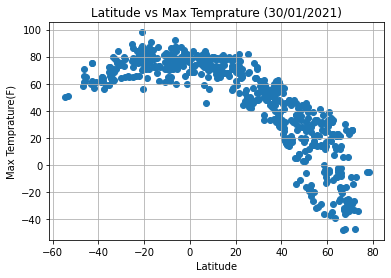

In [11]:
from datetime import date
today = date.today()

fig = plt.figure()
plt.grid()

plt.scatter(clean_city_df['Lat'],clean_city_df['Max Temp'])

plt.xlabel("Latitude")
plt.ylabel("Max Temprature(F)")
plt.title(f"Latitude vs Max Temprature ({today.strftime('%d/%m/%Y')})")
plt.show()

fig.savefig("output_data\Lat_Temp.png")

# Analysis
# As Latitude increses, Temp drops
# Max Temp notice around -30 to +30 Latitude

## Latitude vs. Humidity Plot

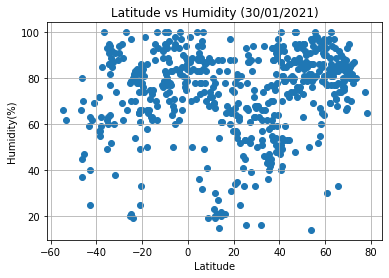

In [12]:
fig = plt.figure()
plt.grid()

plt.scatter(clean_city_df['Lat'],clean_city_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"Latitude vs Humidity ({today.strftime('%d/%m/%Y')})")
plt.show()

fig.savefig("output_data\Lat_Humidity.png")

# Analysis
# There is not direct relation between Latitude and Humidity

## Latitude vs. Cloudiness Plot

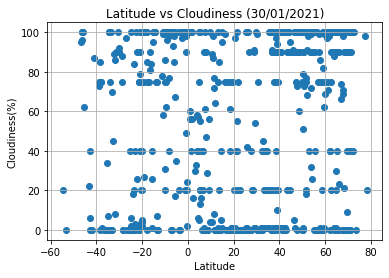

In [13]:
fig = plt.figure()
plt.grid()

plt.scatter(clean_city_df['Lat'],clean_city_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"Latitude vs Cloudiness ({today.strftime('%d/%m/%Y')})")
plt.show()

fig.savefig("output_data\Lat_Cloundiness.png")

# Analysis
# There are More cloudiness around Equator.

## Latitude vs. Wind Speed Plot

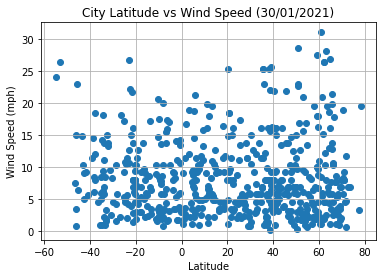

In [14]:
fig = plt.figure()
plt.grid()

plt.scatter(clean_city_df['Lat'],clean_city_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today.strftime('%d/%m/%Y')})")
plt.show()

fig.savefig("output_data\Lat_WindSpeed.png")

# Analysis
# There is no direct relation between Latitude and Wind Speed

## Linear Regression

In [15]:
clean_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,-20.7333,139.5000,98,25,79,6.91,AU,1612055033
1,punta arenas,-53.1500,-70.9167,51,62,0,26.46,CL,1612054652
2,puerto ayora,-0.7393,-90.3518,78,89,49,5.99,EC,1612055034
3,hilo,19.7297,-155.0900,80,57,75,8.05,US,1612055034
4,esperance,-33.8667,121.9000,68,64,0,13.80,AU,1612055034
...,...,...,...,...,...,...,...,...,...
562,nawabshah,26.2483,68.4096,44,87,0,4.68,PK,1612054918
563,brainerd,46.3580,-94.2008,30,74,90,6.91,US,1612055147
564,saint-leu,-21.1500,55.2833,75,61,3,1.52,RE,1612055107
565,salamanca,40.8333,-6.0000,45,51,100,4.00,ES,1612055140


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
from scipy.stats import linregress
import scipy.stats as st

# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
northern_hemisphere_df = clean_city_df.loc[clean_city_df['Lat']>=0]
# northern_hemisphere_df

# Southern Hemisphere (less than 0 degrees latitude)
southern_hemisphere_df = clean_city_df.loc[clean_city_df['Lat']<0]
# southern_hemisphere_df

In [25]:
# Function for Linear Regression chart
def linear_regression(x_axis, y_axis, x_label, y_label, title, x, y):
    
    today = date.today()
    
    fig = plt.figure(figsize=(6,4))
    
    plt.scatter(x_axis,y_axis)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title}({today.strftime('%d/%m/%Y')})")

    print(f"The r-value is: {st.pearsonr(x_axis,y_axis)[0]}")

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
    regress_values = x_axis * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,xy=(x,y),fontsize=10,color="red")
    plt.show()

The r-value is: -0.8642627176218141


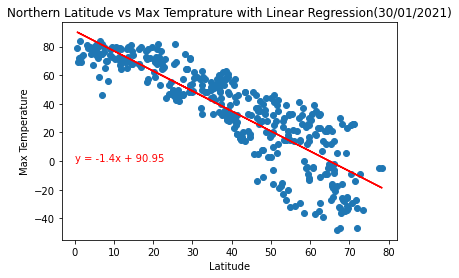

In [27]:
linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'],"Latitude","Max Temperature",
                 "Northern Latitude vs Max Temprature with Linear Regression", 0 ,0)

# Analysis
# Strong negative correlation between Latitude and Max Temp (As Latitude increases Max Temp drops)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5044840534232407


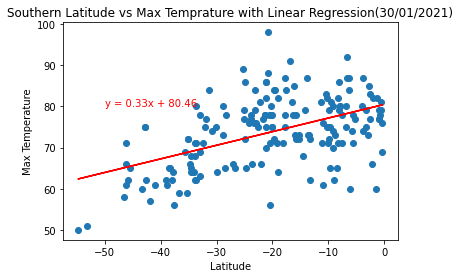

In [28]:
linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'],"Latitude","Max Temperature",
                 "Southern Latitude vs Max Temprature with Linear Regression", -50 ,80)

# Analysis
# Strong positive correlation between Latitude and Max Temp (Towards equator Max Temp increses)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2928402104107457


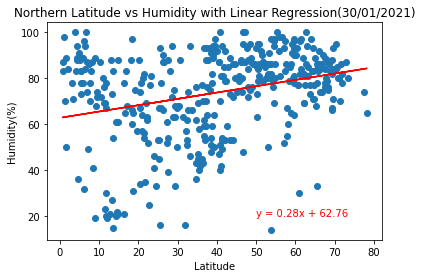

In [39]:
linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'],"Latitude","Humidity(%)",
                 "Northern Latitude vs Humidity with Linear Regression", 50 ,20)

# Analysis
# weakly positive correlation between Latitude and Humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3330606046421729


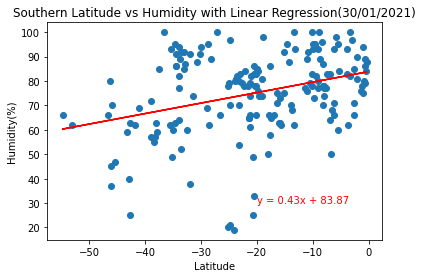

In [40]:
linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'],"Latitude","Humidity(%)",
                 "Southern Latitude vs Humidity with Linear Regression", -20 ,30)

# Analysis
# weakly positive correlation between Latitude and Humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25954799564012054


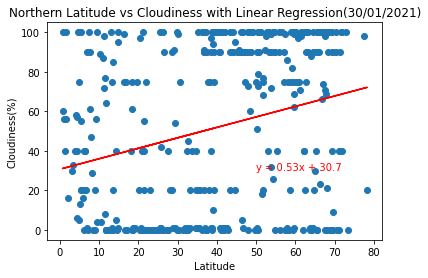

In [41]:
linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'],"Latitude","Cloudiness(%)",
                 "Northern Latitude vs Cloudiness with Linear Regression", 50 ,30)

# Analysis
# weakly positive correlation between Latitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2704875533409745


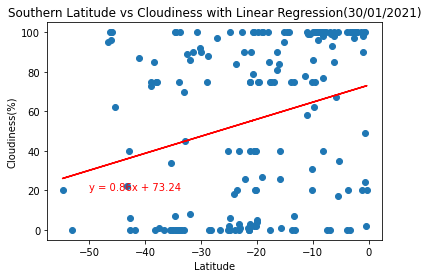

In [42]:
linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'],"Latitude","Cloudiness(%)",
                 "Southern Latitude vs Cloudiness with Linear Regression", -50 ,20)

# Analysis
# weakly positive correlation between Latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0271404959648707


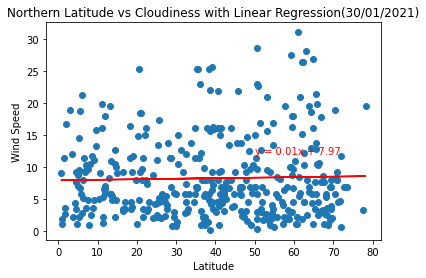

In [43]:
linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'],"Latitude","Wind Speed",
                 "Northern Latitude vs Cloudiness with Linear Regression", 50 ,12)

# Analysis
# no corelation between Latitude and Wind Speed

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.17904198316767117


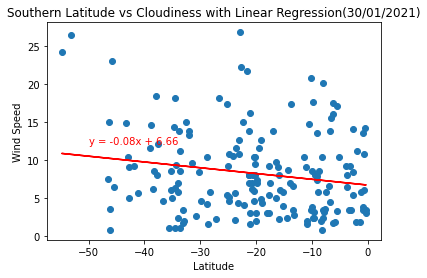

In [44]:
linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'],"Latitude","Wind Speed",
                 "Southern Latitude vs Cloudiness with Linear Regression", -50 ,12)
# Analysis
# weakly negative corealtion between Latitude and Wind Speed